<h1 style='color: green; font-size: 36px; font-weight: bold;'>Linear Regression - supervised learning model</h1>

## The Dataset and the Project
<hr>

### Source: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A
Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>The objective of this training will be to estimate a <b>Machine Learning</b> model using the <b>Linear Regression</b> technique to demonstrate the impacts of the variables available in this dataset on beer consumption (Y). At the end of the project we will have a forecast model for the average consumption of beer according to the inputs of a set of variables (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Data (sample) were collected in São Paulo - Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years old (average).</p>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>date</b> - Date</li>
    <li><b>temp_avg</b> - Average temperature (°C)</li>
    <li><b>temp_min</b> - Minimum temperature (°C)</li>
    <li><b>temp_max</b> - Maximum temperature (°C)</li>
    <li><b>rain</b> - Precipitation (mm)</li>
    <li><b>wknd</b> - Weekend (1 = Yes; 0 = No)</li>
    <li><b>consumption</b> - Beer consumption (liters)</li>
</ul>

# <font color='red' style='font-size: 30px;'>Knowing the Dataset</font>
<hr style='border: 2px solid red;'>

## Importing libraries

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Optional Libraries

https://docs.python.org/3/library/warnings.html

In [8]:
import warnings

warnings.filterwarnings('ignore') # or warnings.filterwarnings(action = 'once')

## Reading the data

In [9]:
df = pd.read_csv('/home/carlos/projetosDS/Alura-DS/Curso Data Science/08_regressao_linear/beer_consumption/beer_consumption.csv', sep=';')
df.head()

,date,temp_avg,temp_min,temp_max,rain,wknd,consumption
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Checking Dataset Size

In [10]:
df.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Preliminary Analyzes</font>
<hr style='border: 2px solid red;'>

## Descriptive statistics

In [11]:
df.describe().round(2)

,temp_avg,temp_min,temp_max,rain,wknd,consumption
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Correlation matrix

In [12]:
df.corr().round(4)

,temp_avg,temp_min,temp_max,rain,wknd,consumption
temp_avg,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
rain,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
wknd,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumption,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Behavior of the Dependent Variable (Y)</font>
<hr style='border: 2px solid red;'>

# Graphic analysis

## Plotting the *dependent* variable(y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

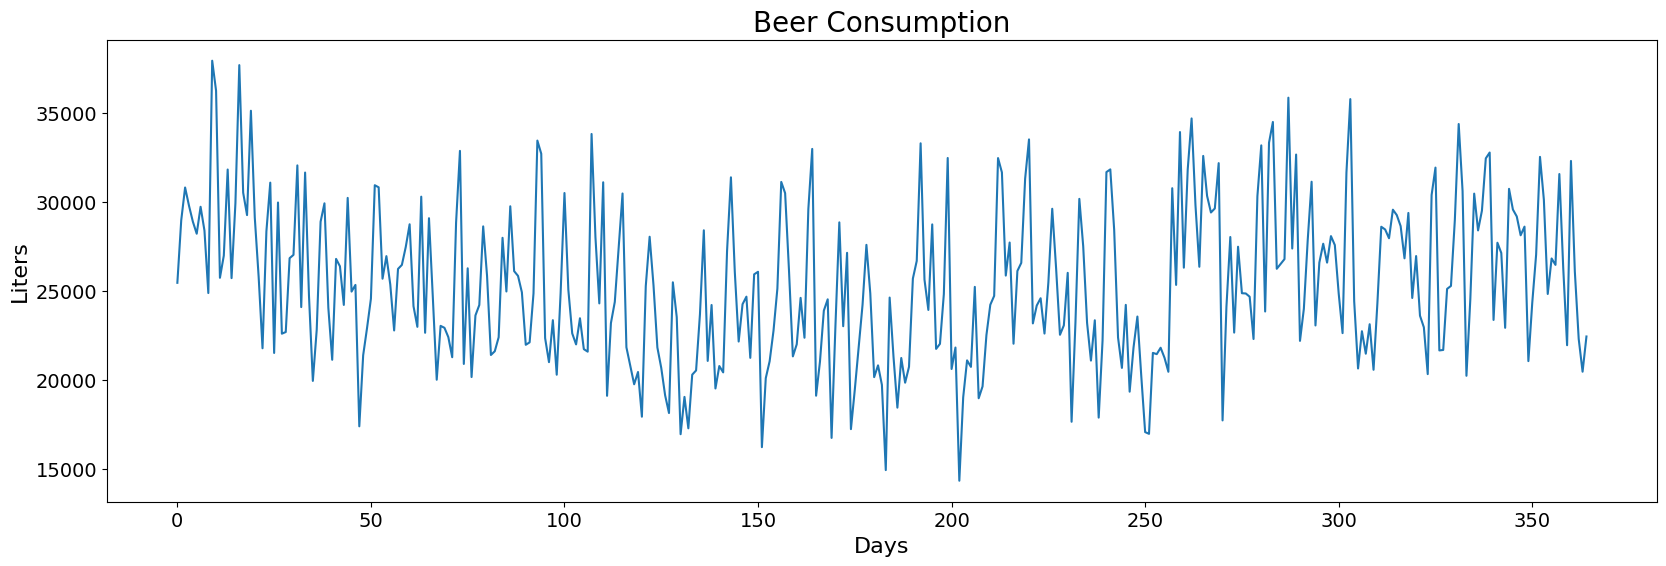

In [13]:
fig, ax  = plt.subplots(figsize = (20,6))

ax.set_title('Beer Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Days', fontsize=16)

ax = df['consumption'].plot(fontsize=14)


# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

In [14]:
import seaborn as sns

## Box plot of *dependent* variable (y)


https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

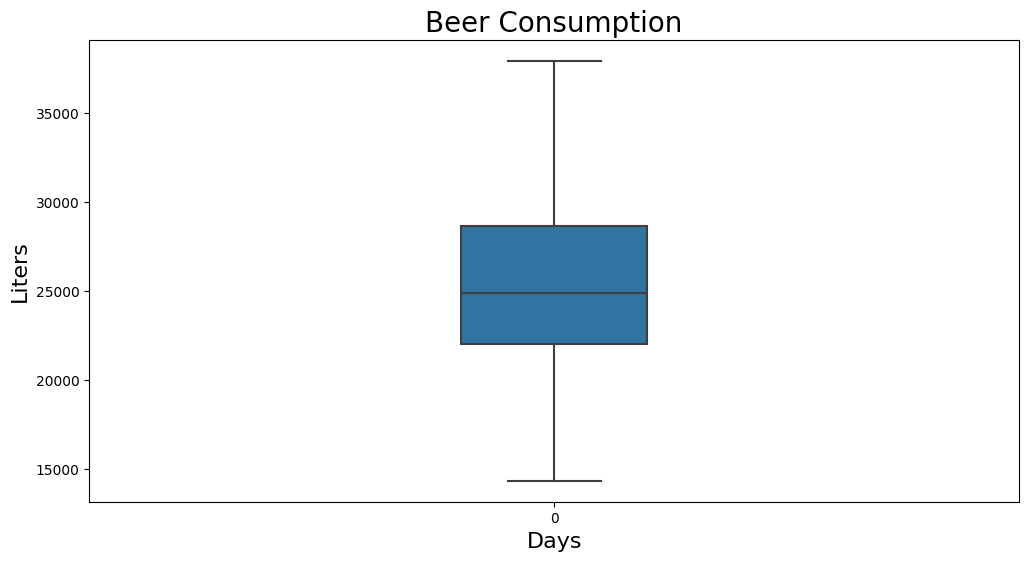

In [15]:
ax = sns.boxplot(data=df['consumption'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Days', fontsize=16)
ax = ax


# <font color='red' style='font-size: 30px;'>Box Plot with Two Variables</font>
<hr style='border: 2px solid red;'>

## Investigating the *dependent* variable (y) according to a given characteristic


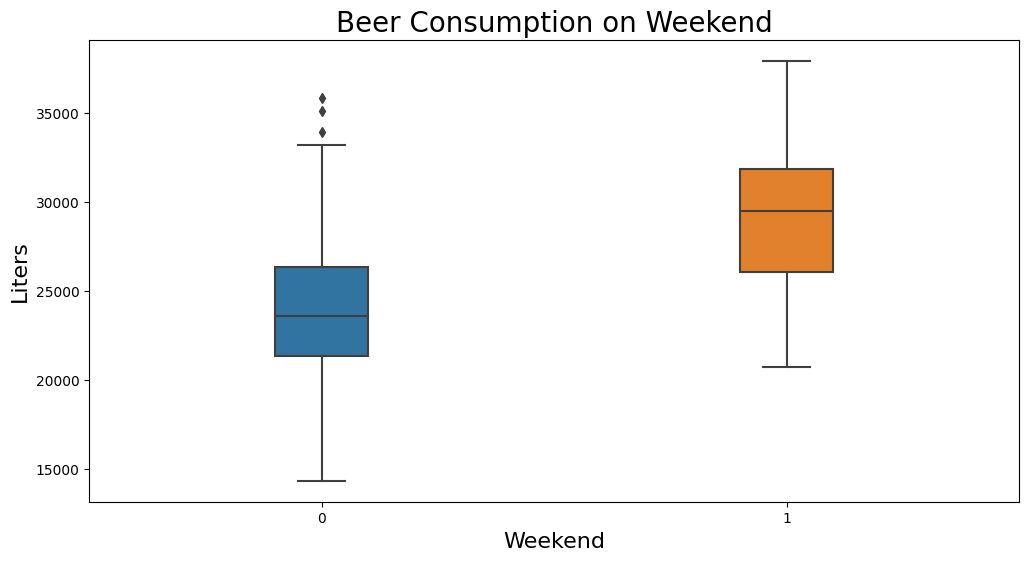

In [16]:
ax = sns.boxplot(y='consumption', x='wknd', data=df, orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer Consumption on Weekend', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Weekend', fontsize=16)
ax = ax

# <font color='red' style='font-size: 30px;'>Frequency Distribution</font>
<hr style='border: 2px solid red;'>

## Frequency distribution of the *dependent* variable (y)


https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

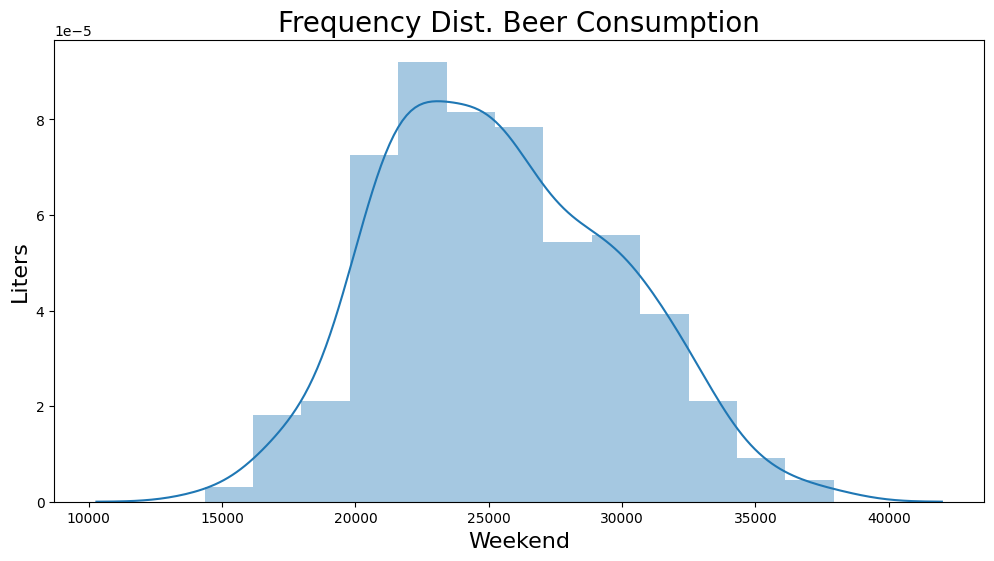

In [17]:
ax = sns.distplot(df['consumption'])
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Dist. Beer Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Weekend', fontsize=16)
ax = ax

# <font color='red' style='font-size: 30px;'>Dependent Variable X Explanatory Variables (pairplot)</font>
<hr style='border: 2px solid red;'>

## Scatter plots between dataset variables

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plots the relationship between pairs of variables in a dataset.</p>

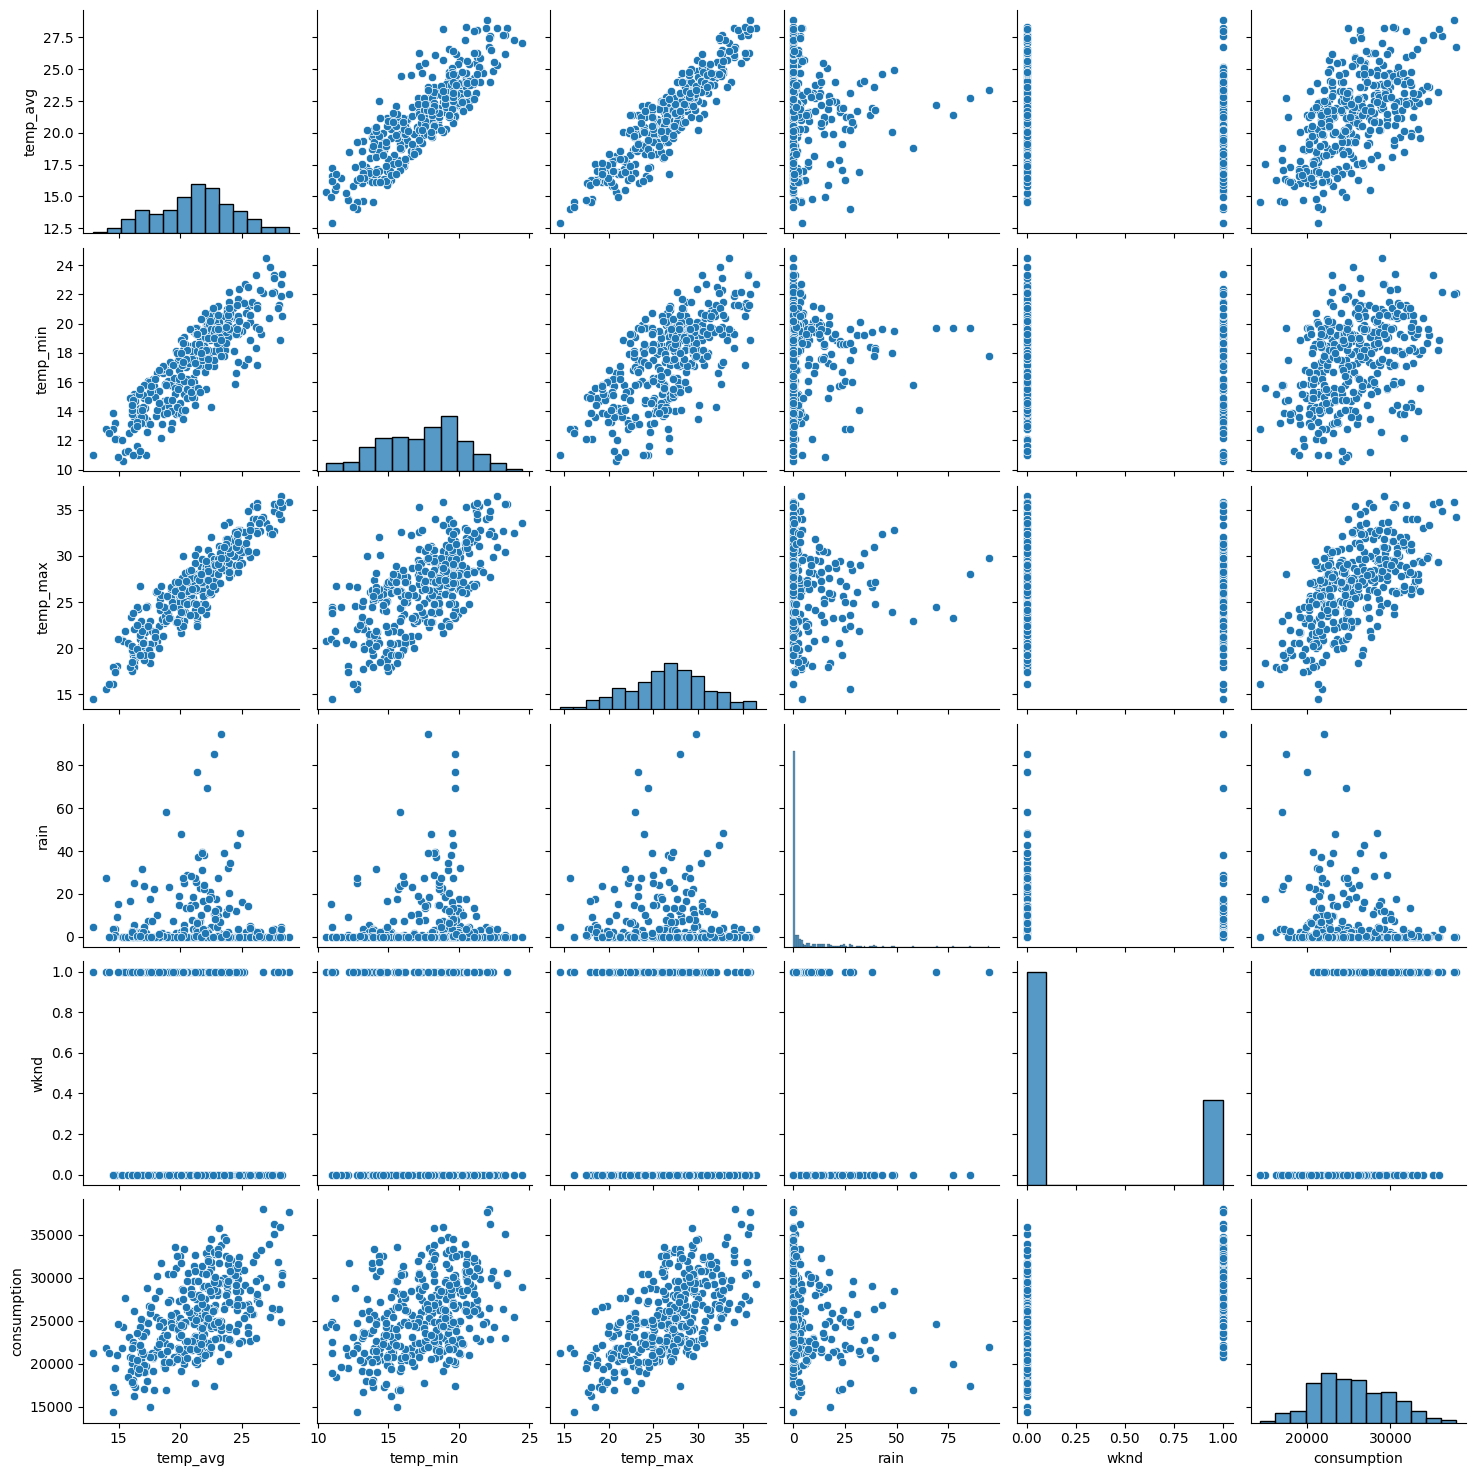

In [18]:
ax = sns.pairplot(df)

## Plotting the pairplot by fixing only one variable on the y-axis


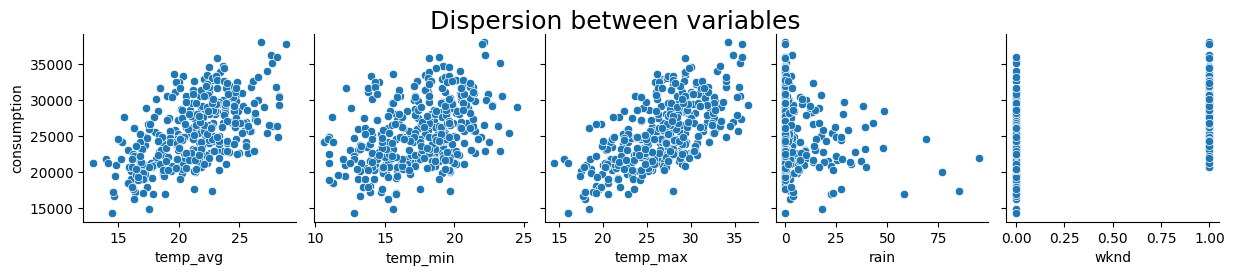

In [19]:
ax = sns.pairplot(df, y_vars='consumption', x_vars=['temp_avg','temp_min','temp_max','rain', 'wknd'])
ax.fig.suptitle('Dispersion between variables', fontsize = 18, y=1.06)
ax=ax

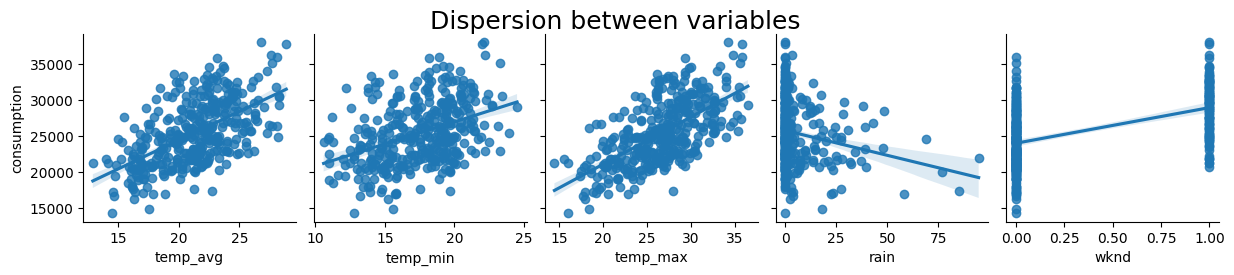

In [20]:
# kind='reg' will show a regression trace.
ax = sns.pairplot(df, y_vars='consumption', x_vars=['temp_avg','temp_min','temp_max','rain', 'wknd'], kind='reg')
ax.fig.suptitle('Dispersion between variables', fontsize = 18, y=1.06)
ax=ax

# <font color='red' style='font-size: 30px;'>Estimating a Linear Regression Model for Consumption</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
from sklearn.model_selection import train_test_split

## Creating a Series (pandas) to store the Beer Consumption (y)


In [22]:
y = df['consumption']

## Creating a DataFrame (pandas) to store the explanatory variables (X)


In [23]:
X = df[['temp_max', 'rain', 'wknd']]

## Creating the training and testing datasets


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Checking the sizes of the files generated by the *train_test_split* function

In [25]:
X_train.shape

(255, 3)

In [26]:
X_test.shape

(110, 3)

## Importing *LinearRegression* and *metrics* from the *scikit-learn* library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instantiating the class *LinearRegression()*


In [28]:
model = LinearRegression()

## Using the *fit()* method of the "model" object to estimate our linear model using the TRAINING data (y_train and X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [29]:
model.fit(X_train, y_train)

LinearRegression()


## Obtaining the coefficient of determination (R²) of the estimated model with the TRAINING data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coefficient of Determination - R²

The coefficient of determination (R²) is a summary measure that tells how well the regression line fits the data. It is a value between 0 and 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{ i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [30]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.73


## Generating predictions for TEST data (X_test) using the *predict()* method of the "model" object

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [31]:
y_predict = model.predict(X_test)

## Getting the coefficient of determination (R²) for our model's predictions

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [32]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round(2))

R² = 0.69



# <font color='red' style='font-size: 30px;'>Getting Spot Forecasts</font>
<hr style='border: 2px solid red;'>

## Input data

In [33]:
# getting the first test record for verification
entry = X_test[0:1]
entry

,temp_max,rain,wknd
5,30.5,12.2,0


## Generating point forecast


In [34]:
# now making a consumption forecast on top of the first record to know the consumption
model.predict(entry)[0]

26094.901775262017

## Creating a simple simulator

In [65]:
temp_max = 32.5
rain = 10
wknd = 1
entry = [[temp_max, rain, wknd]]

print(f'{round(model.predict(entry)[0],2)} liters')

32999.18 liters


# <font color='red' style='font-size: 30px;'>Interpretation of Estimated Coefficients</font>
<hr style='border: 2px solid red;'>

In [36]:
# removing the influence of other variables (temp.max, rain, etc) we can calculate the average consumption of beers.
model.intercept_

5951.976339312445

In [37]:
type(model.intercept_)

numpy.float64

## Getting the regression coefficients

In [38]:
model.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [39]:
type(model.coef_)

numpy.ndarray

## Confirming the order of explanatory variables in the DataFrame

In [40]:
X.columns

Index(['temp_max', 'rain', 'wknd'], dtype='object')

## Creating a list with the names of the model variables

In [41]:
index = ['Intercept', 'Temp. Max', 'Rain', 'Wknd']


## Creating a DataFrame to store the model coefficients
https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [42]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parameters'])

,Parameters
Intercept,5951.976339
Temp. Max,684.736759
Rain,-60.782435
Wknd,5401.083339


## Interpretation of Estimated Coefficients

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercept</b> → Excluding the effect of the explanatory variables ($X_2=X_3=X_4=0$) the average effect on Beer Consumption would be <b>5951.98 liters</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Maximum Temperature (°C)</b> → Keeping the values ​​of $X_3$ (Rain) and $X_4$ (Weekend) constant, the increase of 1°C in the Maximum Temperature generates an average variation in Beer Consumption of <b>684.74 liters</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Rainfall (mm)</b> → Keeping the values ​​of $X_2$ (Maximum Temperature) and $X_4$ (Weekend) constant, the addition of 1mm of Rainfall generates an average variation in Beer Consumption of <b>-60.78 liters</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Weekend (Yes/No)</b> → Keeping the values ​​of $X_2$ (Maximum Temperature) and $X_3$ (Rain) constant, the fact that the day is classified as Weekend generates an average change in Beer Consumption of <b>5401.08 liters</b>.
</p>


# <font color='red' style='font-size: 30px;'>Graphical Analysis of Model Predictions</font>
<hr style='border: 2px solid red;'>

## Generating model predictions for TRAINING data


In [43]:
y_predict_train = model.predict(X_train)

## Scatter plot between estimated value and actual value

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

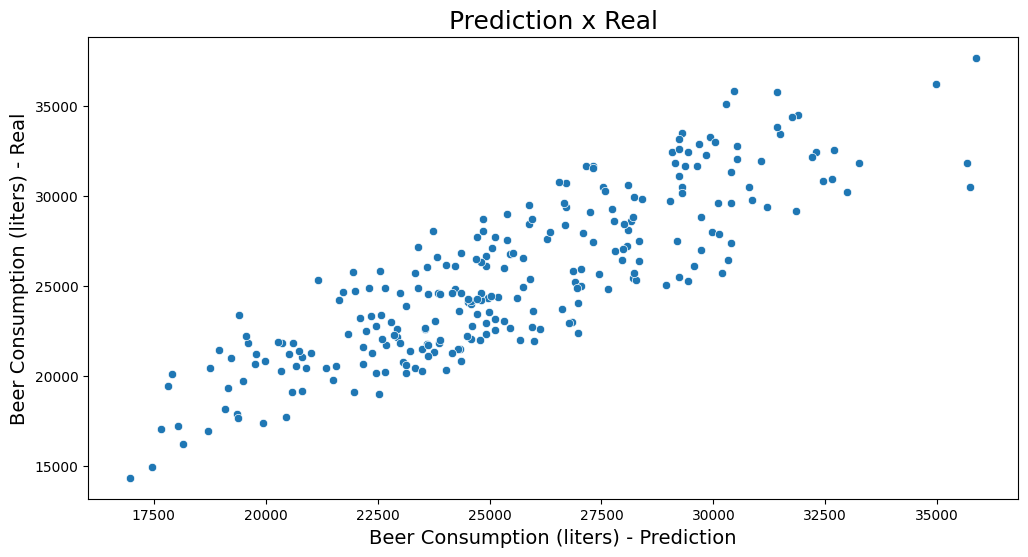

In [44]:
ax = sns.scatterplot(x=y_predict_train, y= y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Prediction x Real', fontsize=18)
ax.set_xlabel('Beer Consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Beer Consumption (liters) - Real', fontsize=14)
ax=ax


When analyzing the graph visually, we can find some problems. The forecasts at the bottom of the graph appear scattered when dealing with higher values.

## Getting the residuals
    Calculate the dispersion.

In [45]:
residue = y_train - y_predict_train


## Scatter plot between estimated value and residuals

Informal method for verifying the hypothesis of constant variance of residuals (homocedasticity)

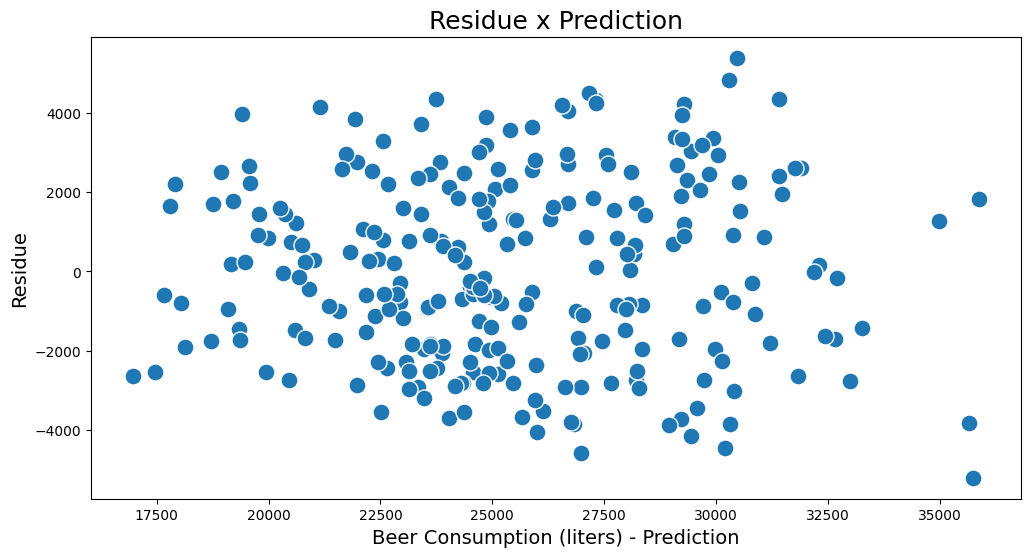

In [46]:
ax = sns.scatterplot(x=y_predict_train, y= residue, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Residue x Prediction', fontsize=18)
ax.set_xlabel('Beer Consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Residue', fontsize=14)
ax=ax

We will have the graph with the scattered points. In our graph, we see that the variation occurs more expressively when we are dealing with larger values, and not a constant variation throughout the process.

## Using the squared residuals

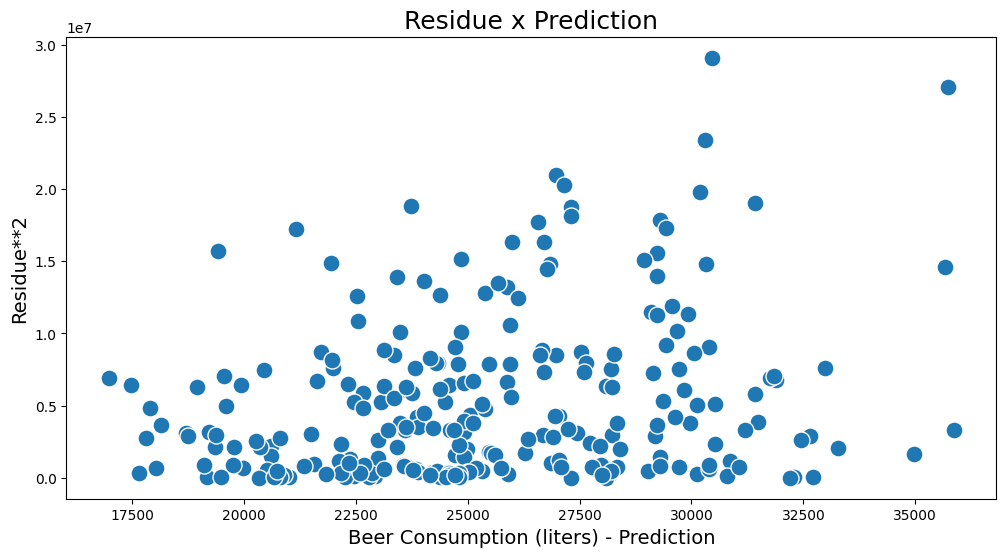

In [47]:
ax = sns.scatterplot(x=y_predict_train, y= residue**2, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Residue x Prediction', fontsize=18)
ax.set_xlabel('Beer Consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Residue**2', fontsize=14)
ax=ax

In this way we can verify with more clarity if in fact there is a constant variation in the residue. Since we are dealing with a small dataset, this issue often occurs.

## Plotting the frequency distribution of the residuals


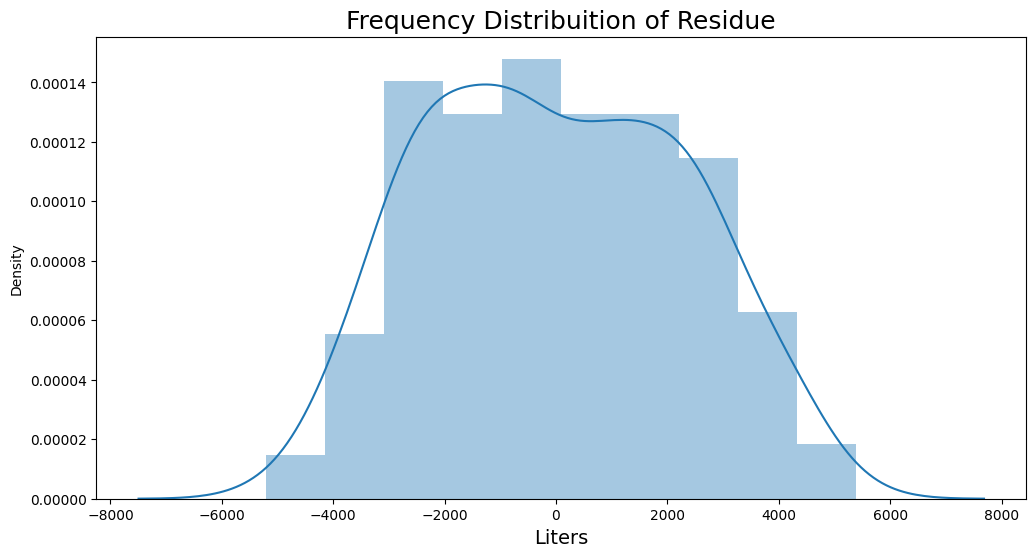

In [48]:
ax = sns.distplot(residue)
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Distribuition of Residue', fontsize=18)
ax.set_xlabel('Liters', fontsize=14)
ax=ax

We will see something that looks like a normal curve, but if we increase the number of bars that make up the graph by inserting the bins=50 parameter, we will see that the variation presents problems.

As we are using temporal data in our project, it would be interesting to estimate the complete data and plot the residuals in time.

# <font color='red' style='font-size: 30px;'>Comparing Templates</font>
<hr style='border: 2px solid red;'>


## Estimating a new model by replacing the explanatory variable Maximum Temperature with Average Temperature

In [49]:
X2 = df[['temp_avg','rain', 'wknd']]

## Creating the training and testing datasets

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instantiating the class *LinearRegression()*


In [51]:
model2 = LinearRegression()

## Using the *fit()* method of the "model_2" object to estimate our linear model using the TRAINING data (y2_train and X2_train)


In [52]:
model2.fit(X2_train, y2_train)

LinearRegression()


## Obtaining the coefficient of determination (R²) of the new estimated model and comparing it with the result of the previous model. Closer to 1, the better.

In [53]:
print(f'Model with Temp.Max o R² = {round(model.score(X_train, y_train),2)}')

Model with Temp.Max o R² = 0.73


In [54]:
print(f'Model with Temp.Avg o R² = {round(model2.score(X2_train, y2_train),2)}')

Model with Temp.Avg o R² = 0.66



## Generating predictions for TEST data (X_test and X2_test) using the *predict()* method of objects "model" and "model_2"

In [55]:
y_predict = model.predict(X_test)
y_predict2 = model2.predict(X2_test)


## Obtaining the coefficient of determination (R²) for the predictions of the two models

In [56]:
print(f'Model with Temp.Avg o R² = {round(metrics.r2_score(y2_test, y_predict2),2)}')

Model with Temp.Avg o R² = 0.66


In [57]:
print(f'Model with Temp.Max o R² = {round(metrics.r2_score(y_test, y_predict),2)}')

Model with Temp.Max o R² = 0.69



# <font color='red' style='font-size: 30px;'>Saving and Loading the Estimated Template</font>
<hr style='border: 2px solid red;'>

## Input data


In [58]:
# getting the first test record for verification
entry = X_test[0:1]
entry

,temp_max,rain,wknd
5,30.5,12.2,0


## Generating point forecast

In [59]:
# now making a consumption forecast on top of the first record to know the consumption
model.predict(entry)[0]

26094.901775262017

## Creating a simple simulator

In [64]:
temp_max = 32.5
rain = 10
wknd = 1
entry = [[temp_max, rain, wknd]]

print(f'{round(model.predict(entry)[0],2)} liters')

32999.18 liters


## Saving the estimated model

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>The <b>pickle</b> module implements binary protocols to serialize and deserialize the structure of a Python object.</p>

In [61]:
import pickle

In [63]:
output = open('beer_consumption_model', 'wb')
pickle.dump(model, output)
output.close()

### In a new Python notebook/project

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

model = open('beer_consumption_model','rb')
lm_new = pickle.load(model)
model.close()

temp_max = 30.5
rain = 12.2
wknd = 0
entry = [[temp_max, rain, wknd]]
print('{0:.2f} liters'.format(lm_new.predict(entry)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 liters
```